In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import time
import sys
from datetime import datetime
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def getAndParseURL(url):
    result = requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
    soup = bts(result.text, 'html.parser')
    return soup

In [3]:
TOTAL_LINK = []
for totalLink in range(1,17):
    TOTAL_LINK.append("https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa="+str(totalLink))

In [4]:
ALL_PRODUCT_URL = []
for products in TOTAL_LINK[::]:
    html= getAndParseURL(products)
    for link in html.findAll("li",{"class":"productListContent-item"}):
        ALL_PRODUCT_URL.append("https://www.hepsiburada.com"+link.a["href"])

        print(TOTAL_LINK)

['https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=1', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=2', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=3', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=4', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=5', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=6', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=7', 'https://www.hepsiburada.com/ara?q=no-frost%20buzdolab%C4%B1&kategori=2147483637_235604&filtreler=fiyat:2500-max&sayfa=8', 'https://www.he

In [5]:
result = []
for details in ALL_PRODUCT_URL[::]:
    html = getAndParseURL(details)
 
    Urun_Adi = html.find("h1",{"itemprop":"name"}).text.strip()
    
    try:
        Uretici = html.find("div",{"id":"productTechSpecContainer"}).find(text=re.compile("Üretici")).findNext().text.strip()
    except:
        Uretici = np.nan    

    Fiyat = html.find("span",{"data-bind":"markupText:'currentPriceBeforePoint'"}).text.strip()
    
    try:
        Degerlendirme = html.find("a",{"id":"productReviewsTab"}).text.strip().split("(")[1].split(")")[0]
    except:
        Degerlendirme = np.nan
        
    try:
        Hacim = html.find("div", class_ = "key-properties").find(text=" Hacim (L) ").findNext().text.strip()
    except:
        Hacim = np.nan

    try:
        Enerji_Sinifi = html.find("div",{"id":"productTechSpecContainer"}).find(text="AB Yeni Enerji Sınıfı").findNext().text.strip()
    except:
        Enerji_Sinifi = np.nan
    try:
        Yillik_Enerji_Tuketimi = html.find("div",{"id":"productTechSpecContainer"}).find(text="Yıllık Enerji Tüketimi (kWh)").findNext().text.strip().split(' ')[0].split(',')[0].split('.')[0]
    except:
        Yillik_Enerji_Tuketimi = np.nan

    try:
        Renk = html.find("div",{"id":"productTechSpecContainer"}).find(text=re.compile("Renk")).findNext().text.strip()
    except:
        Renk = np.nan    
        

    result.append([Urun_Adi,Uretici,Fiyat,Degerlendirme,Hacim,Enerji_Sinifi, Yillik_Enerji_Tuketimi,Renk])

    kolon_name = ['Urun_Adi','Uretici','Fiyat','Degerlendirme','Hacim','Enerji_Sinifi', 'Yillik_Enerji_Tuketimi', 'Renk']
df = pd.DataFrame.from_records(result,columns=kolon_name)

In [8]:
df

,Urun_Adi,Uretici,Fiyat,Degerlendirme,Hacim,Enerji_Sinifi,Yillik_Enerji_Tuketimi,Renk
0,Samsung RT46K6000WW/TR No-Frost Buzdolabı,Samsung,8.369,951,468,F,323,Beyaz
1,Vestel NF52101 No-Frost Buzdolabı,Vestel,7.399,34,NaN,F,312,Beyaz
2,Samsung RB50RS334SA/TR No-Frost Buzdolabı,Samsung,13.103,298,520,F,340,Gri
3,Vestel NF45001 No-Frost Buzdolabı,Vestel,6.999,217,403,F,310,Beyaz
4,Profilo BD2155WFNN 453 L No-Frost Çift Kapılı ...,Profilo,7.812,112,453,F,336,Beyaz
...,...,...,...,...,...,...,...,...
368,Teka CI3 350 NF Ankastre Kombi Buzdolabı,Teka,15.141,0,275,E,252,Beyaz
369,Regal Nfk 54020 Bc Buzdolabı,Regal,10.730,0,540,E,287,Beyaz
370,Beko 983650 Eı 630 Lt D Enerji Leke Tutmayan I...,Beko,19.747,0,NaN,D,250,Inox
371,Teka RFD 77820 GBK Solo Gardrop Tipi NoFrost B...,Teka,56.688,0,500,E,333,Siyah


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Urun_Adi                373 non-null    object
 1   Uretici                 372 non-null    object
 2   Fiyat                   373 non-null    object
 3   Degerlendirme           373 non-null    object
 4   Hacim                   279 non-null    object
 5   Enerji_Sinifi           359 non-null    object
 6   Yillik_Enerji_Tuketimi  373 non-null    object
 7   Renk                    373 non-null    object
dtypes: object(8)
memory usage: 23.4+ KB


In [11]:
df['Fiyat'] = df['Fiyat'].apply(lambda x : str(x).replace(".","")).astype(int)
df['Yillik_Enerji_Tuketimi'] = df['Yillik_Enerji_Tuketimi'].apply(lambda x : str(x).replace(".",",")).astype(int)
df['Degerlendirme'] = df['Degerlendirme'].astype(int)

In [12]:
#subset içerisine ürün adı ve Fiyat kolonlarını eklemiyoruz.
subset=['Uretici','Enerji_Sinifi','Yillik_Enerji_Tuketimi','Renk','Degerlendirme','Hacim','Fiyat']

In [13]:
df=df.loc[:,subset]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Uretici                 372 non-null    object
 1   Enerji_Sinifi           359 non-null    object
 2   Yillik_Enerji_Tuketimi  373 non-null    int32 
 3   Renk                    373 non-null    object
 4   Degerlendirme           373 non-null    int32 
 5   Hacim                   279 non-null    object
 6   Fiyat                   373 non-null    int32 
dtypes: int32(3), object(4)
memory usage: 16.2+ KB


In [14]:
df

,Uretici,Enerji_Sinifi,Yillik_Enerji_Tuketimi,Renk,Degerlendirme,Hacim,Fiyat
0,Samsung,F,323,Beyaz,951,468,8369
1,Vestel,F,312,Beyaz,34,NaN,7399
2,Samsung,F,340,Gri,298,520,13103
3,Vestel,F,310,Beyaz,217,403,6999
4,Profilo,F,336,Beyaz,112,453,7812
...,...,...,...,...,...,...,...
368,Teka,E,252,Beyaz,0,275,15141
369,Regal,E,287,Beyaz,0,540,10730
370,Beko,D,250,Inox,0,NaN,19747
371,Teka,E,333,Siyah,0,500,56688


In [15]:
df['Hacim'] = df['Hacim'].astype(float)
df['Hacim'].isnull().value_counts()
df['Hacim'].fillna((df['Hacim'].mean()), inplace = True)
df = df.round({'Hacim': 0})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Uretici                 372 non-null    object 
 1   Enerji_Sinifi           359 non-null    object 
 2   Yillik_Enerji_Tuketimi  373 non-null    int32  
 3   Renk                    373 non-null    object 
 4   Degerlendirme           373 non-null    int32  
 5   Hacim                   373 non-null    float64
 6   Fiyat                   373 non-null    int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 16.2+ KB


In [17]:
new_df1 = df

In [18]:
new_df1

,Uretici,Enerji_Sinifi,Yillik_Enerji_Tuketimi,Renk,Degerlendirme,Hacim,Fiyat
0,Samsung,F,323,Beyaz,951,468.0,8369
1,Vestel,F,312,Beyaz,34,520.0,7399
2,Samsung,F,340,Gri,298,520.0,13103
3,Vestel,F,310,Beyaz,217,403.0,6999
4,Profilo,F,336,Beyaz,112,453.0,7812
...,...,...,...,...,...,...,...
368,Teka,E,252,Beyaz,0,275.0,15141
369,Regal,E,287,Beyaz,0,540.0,10730
370,Beko,D,250,Inox,0,520.0,19747
371,Teka,E,333,Siyah,0,500.0,56688


In [19]:
new_df1['Renk'].unique()
new_df1['Renk'].value_counts()

Beyaz          171
Inox           120
Gri             25
Siyah           20
Gümüş           17
Kırmızı          3
Koyu Mavi        2
Mavi             2
Bordo            2
Koyu Gri         2
Siyah - Gri      2
Yeşil            2
Açık Siyah       1
Açık Gri         1
Bej              1
Siyah Inox       1
Turuncu          1
Name: Renk, dtype: int64

In [20]:
new_df1["Renk"].replace({"Açık Gri": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Bej": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Gri": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Gümüş": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Inox": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Koyu Gri": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Siyah - Gri": "Gri"}, inplace=True)
new_df1["Renk"].replace({"Bordo": "Renkli"}, inplace=True)
new_df1["Renk"].replace({"Koyu Mavi": "Renkli"}, inplace=True)
new_df1["Renk"].replace({"Kırmızı": "Renkli"}, inplace=True)
new_df1["Renk"].replace({"Mavi": "Renkli"}, inplace=True)
new_df1["Renk"].replace({"Turuncu": "Renkli"}, inplace=True)
new_df1["Renk"].replace({"Açık Siyah": "Siyah"}, inplace=True)
new_df1["Renk"].replace({"Siyah": "Siyah"}, inplace=True)
new_df1["Renk"].replace({"Beyaz": "Beyaz"}, inplace=True)
new_df1 = pd.get_dummies(new_df1, columns=['Renk'], drop_first = True)

In [21]:
new_df1

,Uretici,Enerji_Sinifi,Yillik_Enerji_Tuketimi,Degerlendirme,Hacim,Fiyat,Renk_Gri,Renk_Renkli,Renk_Siyah,Renk_Siyah Inox,Renk_Yeşil
0,Samsung,F,323,951,468.0,8369,0,0,0,0,0
1,Vestel,F,312,34,520.0,7399,0,0,0,0,0
2,Samsung,F,340,298,520.0,13103,1,0,0,0,0
3,Vestel,F,310,217,403.0,6999,0,0,0,0,0
4,Profilo,F,336,112,453.0,7812,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
368,Teka,E,252,0,275.0,15141,0,0,0,0,0
369,Regal,E,287,0,540.0,10730,0,0,0,0,0
370,Beko,D,250,0,520.0,19747,1,0,0,0,0
371,Teka,E,333,0,500.0,56688,0,0,1,0,0


In [22]:
new_df2 = new_df1

In [23]:
new_df2['Uretici'].unique()
new_df2['Uretici'].value_counts()

Vestel        74
Bosch         62
Arçelik       42
Siemens       39
Samsung       33
Profilo       33
LG            21
Beko          14
Teka          11
Liebherr      11
Regal          9
Sharp          7
Franke         5
Uğur           3
Hoover         3
Electrolux     2
Finlux         1
Dijitsu        1
Altus          1
Name: Uretici, dtype: int64

In [24]:
new_df2["Uretici"].replace({"Vestel": "Yerli"}, inplace=True)
new_df2["Uretici"].replace({"Profilo": "Yerli"}, inplace=True)
new_df2["Uretici"].replace({"Arçelik": "Yerli"}, inplace=True)
new_df2["Uretici"].replace({"Beko": "Yerli"}, inplace=True)
new_df2["Uretici"].replace({"Regal": "Yerli"}, inplace=True)
new_df2["Uretici"].replace({"Altus": "Yerli"}, inplace=True)
new_df2["Uretici"].replace({"Uğur": "Yerli"}, inplace=True)

In [25]:
new_df2.dropna(subset=['Uretici'], inplace=True)
new_df2 = pd.get_dummies(new_df2, columns=['Uretici'], drop_first = True)

In [44]:
new_df2.head(5)

,Enerji_Sinifi,Yillik_Enerji_Tuketimi,Degerlendirme,Hacim,Fiyat,Renk_Gri,Renk_Renkli,Renk_Siyah,Renk_Siyah Inox,Renk_Yeşil,...,Uretici_Hoover,Uretici_LG,Uretici_Liebherr,Uretici_Samsung,Uretici_Sharp,Uretici_Siemens,Uretici_Teka,Uretici_Yerli,Scale_Energy,log_price
0,F,323,951,468.0,8369,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4,9.032290
1,F,312,34,520.0,7399,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,8.909100
2,F,340,298,520.0,13103,1,0,0,0,0,...,0,0,0,1,0,0,0,0,4,9.480596
3,F,310,217,403.0,6999,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,8.853523
4,F,336,112,453.0,7812,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,8.963416


In [45]:
new_df3 = new_df2

In [46]:
new_df3['Enerji_Sinifi'].value_counts()
new_df3['Enerji_Sinifi'] = new_df3['Enerji_Sinifi'].replace('Yok', np.nan)
new_df3.dropna(subset=['Enerji_Sinifi'], inplace=True)

new_df3["Enerji_Sinifi"].replace({"F": "F"}, inplace=True)
new_df3["Enerji_Sinifi"].replace({"E": "E"}, inplace=True)
new_df3["Enerji_Sinifi"].replace({"A": "A"}, inplace=True)
new_df3["Enerji_Sinifi"].replace({"D": "D"}, inplace=True)
new_df3["Enerji_Sinifi"].replace({"G": "D"}, inplace=True)

In [47]:
new_df3['Enerji_Sinifi'].value_counts()

F    256
E     81
A     16
D      5
Name: Enerji_Sinifi, dtype: int64

In [48]:
scale_mapper = {"A":1, "D": 2,"E":3 ,'F':4}
new_df3["Scale_Energy"] = new_df3["Enerji_Sinifi"].replace(scale_mapper)

In [49]:
new_df4 = new_df3

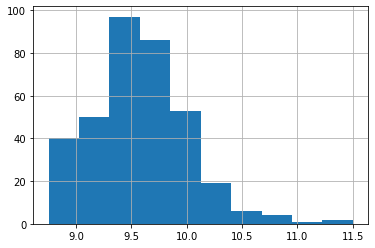

In [50]:
new_df4['log_price']=np.log(new_df4.Fiyat)
new_df4.log_price.hist();

In [51]:
new_df5 = new_df4

In [52]:
subset =['Yillik_Enerji_Tuketimi', 'Degerlendirme',
       'Hacim', 'Renk_Gri', 'Renk_Renkli', 'Renk_Siyah', 'Uretici_Electrolux',
       'Uretici_Finlux', 'Uretici_Franke', 'Uretici_Hoover', 'Uretici_LG',
       'Uretici_Liebherr', 'Uretici_Samsung', 'Uretici_Sharp',
       'Uretici_Siemens', 'Uretici_Teka', 'Uretici_Yerli', 'Scale_Energy','Enerji_Sinifi','log_price','Fiyat']

new_df5 = new_df5.loc[:,subset]
new_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 371
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Yillik_Enerji_Tuketimi  358 non-null    int32  
 1   Degerlendirme           358 non-null    int32  
 2   Hacim                   358 non-null    float64
 3   Renk_Gri                358 non-null    uint8  
 4   Renk_Renkli             358 non-null    uint8  
 5   Renk_Siyah              358 non-null    uint8  
 6   Uretici_Electrolux      358 non-null    uint8  
 7   Uretici_Finlux          358 non-null    uint8  
 8   Uretici_Franke          358 non-null    uint8  
 9   Uretici_Hoover          358 non-null    uint8  
 10  Uretici_LG              358 non-null    uint8  
 11  Uretici_Liebherr        358 non-null    uint8  
 12  Uretici_Samsung         358 non-null    uint8  
 13  Uretici_Sharp           358 non-null    uint8  
 14  Uretici_Siemens         358 non-null    ui

In [53]:
new_df5.corr()
#Yillik_Enerji_Tuketimi
#Uretici_Franke
#Hacim

,Yillik_Enerji_Tuketimi,Degerlendirme,Hacim,Renk_Gri,Renk_Renkli,Renk_Siyah,Uretici_Electrolux,Uretici_Finlux,Uretici_Franke,Uretici_Hoover,Uretici_LG,Uretici_Liebherr,Uretici_Samsung,Uretici_Sharp,Uretici_Siemens,Uretici_Teka,Uretici_Yerli,Scale_Energy,log_price,Fiyat
Yillik_Enerji_Tuketimi,1.000000,-0.031765,0.093423,0.002212,-0.056498,0.036293,0.061325,-0.011634,0.399723,-0.064683,-0.028313,-0.220531,0.076987,0.007131,-0.025413,-0.041985,-0.024509,0.106140,0.178995,0.150303
Degerlendirme,-0.031765,1.000000,-0.088696,-0.069159,-0.053085,-0.069157,-0.009306,-0.009244,-0.037957,-0.027108,0.002362,-0.056784,0.320759,-0.036583,-0.095773,-0.056317,-0.004442,0.086931,-0.237495,-0.164772
Hacim,0.093423,-0.088696,1.000000,0.151017,-0.077489,0.024806,-0.042909,0.001300,-0.056812,0.002258,0.184401,-0.022488,0.072318,0.028937,0.091789,-0.148772,-0.201701,0.063716,0.399042,0.316288
Renk_Gri,0.002212,-0.069159,0.151017,1.000000,-0.154113,-0.221150,0.007151,-0.048117,0.035265,0.101115,0.107403,-0.064311,0.020700,-0.060378,-0.021782,0.033246,-0.044136,-0.123693,0.254070,0.186579
Renk_Renkli,-0.056498,-0.053085,-0.077489,-0.154113,1.000000,-0.041235,-0.012706,-0.008972,-0.020175,-0.015583,-0.042316,0.166273,-0.054016,-0.020175,-0.058415,-0.030182,0.008534,-0.049134,0.031671,0.004808
Renk_Siyah,0.036293,-0.069157,0.024806,-0.221150,-0.041235,1.000000,-0.018233,-0.012874,-0.028950,-0.022362,-0.008964,-0.043310,0.006577,0.178334,0.034633,0.027167,-0.012110,0.095994,0.172648,0.143948
Uretici_Electrolux,0.061325,-0.009306,-0.042909,0.007151,-0.012706,-0.018233,1.000000,-0.003967,-0.008920,-0.006890,-0.018710,-0.013345,-0.023884,-0.008920,-0.025829,-0.013345,-0.071275,-0.062768,-0.010697,-0.020110
Uretici_Finlux,-0.011634,-0.009244,0.001300,-0.048117,-0.008972,-0.012874,-0.003967,1.000000,-0.006299,-0.004865,-0.013212,-0.009423,-0.016865,-0.006299,-0.018238,-0.009423,-0.050328,0.028131,-0.097626,-0.053127
Uretici_Franke,0.399723,-0.037957,-0.056812,0.035265,-0.020175,-0.028950,-0.008920,-0.006299,1.000000,-0.010941,-0.029709,-0.021190,-0.037924,-0.014164,-0.041012,-0.021190,-0.113173,-0.132251,0.174390,0.148424
Uretici_Hoover,-0.064683,-0.027108,0.002258,0.101115,-0.015583,-0.022362,-0.006890,-0.004865,-0.010941,1.000000,-0.022948,-0.016367,-0.029293,-0.010941,-0.031678,-0.016367,-0.087416,-0.076983,-0.066692,-0.039916


In [54]:
new_df7 = new_df5

In [55]:
subset =['Yillik_Enerji_Tuketimi', 'Degerlendirme',
       'Hacim', 'Renk_Gri', 'Renk_Renkli', 'Renk_Siyah', 'Uretici_Electrolux',
       'Uretici_Finlux', 'Uretici_Franke', 'Uretici_Hoover', 'Uretici_LG',
       'Uretici_Liebherr', 'Uretici_Samsung', 'Uretici_Sharp',
       'Uretici_Siemens', 'Uretici_Teka', 'Uretici_Yerli', 'Scale_Energy','log_price']

new_df7 = new_df7.loc[:,subset]
new_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 371
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Yillik_Enerji_Tuketimi  358 non-null    int32  
 1   Degerlendirme           358 non-null    int32  
 2   Hacim                   358 non-null    float64
 3   Renk_Gri                358 non-null    uint8  
 4   Renk_Renkli             358 non-null    uint8  
 5   Renk_Siyah              358 non-null    uint8  
 6   Uretici_Electrolux      358 non-null    uint8  
 7   Uretici_Finlux          358 non-null    uint8  
 8   Uretici_Franke          358 non-null    uint8  
 9   Uretici_Hoover          358 non-null    uint8  
 10  Uretici_LG              358 non-null    uint8  
 11  Uretici_Liebherr        358 non-null    uint8  
 12  Uretici_Samsung         358 non-null    uint8  
 13  Uretici_Sharp           358 non-null    uint8  
 14  Uretici_Siemens         358 non-null    ui

In [56]:
#Yillik_Enerji_Tuketimi
#Uretici_Franke
#Hacim

new_df9 = new_df7.copy()

# multiplicative interaction
new_df9['New_Feature'] = new_df9['Yillik_Enerji_Tuketimi'] * new_df9['Hacim']

In [57]:
new_df7.head()

,Yillik_Enerji_Tuketimi,Degerlendirme,Hacim,Renk_Gri,Renk_Renkli,Renk_Siyah,Uretici_Electrolux,Uretici_Finlux,Uretici_Franke,Uretici_Hoover,Uretici_LG,Uretici_Liebherr,Uretici_Samsung,Uretici_Sharp,Uretici_Siemens,Uretici_Teka,Uretici_Yerli,Scale_Energy,log_price
0,323,951,468.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,9.032290
1,312,34,520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.909100
2,340,298,520.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4,9.480596
3,310,217,403.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.853523
4,336,112,453.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.963416


In [58]:
new_df7.corr()

,Yillik_Enerji_Tuketimi,Degerlendirme,Hacim,Renk_Gri,Renk_Renkli,Renk_Siyah,Uretici_Electrolux,Uretici_Finlux,Uretici_Franke,Uretici_Hoover,Uretici_LG,Uretici_Liebherr,Uretici_Samsung,Uretici_Sharp,Uretici_Siemens,Uretici_Teka,Uretici_Yerli,Scale_Energy,log_price
Yillik_Enerji_Tuketimi,1.000000,-0.031765,0.093423,0.002212,-0.056498,0.036293,0.061325,-0.011634,0.399723,-0.064683,-0.028313,-0.220531,0.076987,0.007131,-0.025413,-0.041985,-0.024509,0.106140,0.178995
Degerlendirme,-0.031765,1.000000,-0.088696,-0.069159,-0.053085,-0.069157,-0.009306,-0.009244,-0.037957,-0.027108,0.002362,-0.056784,0.320759,-0.036583,-0.095773,-0.056317,-0.004442,0.086931,-0.237495
Hacim,0.093423,-0.088696,1.000000,0.151017,-0.077489,0.024806,-0.042909,0.001300,-0.056812,0.002258,0.184401,-0.022488,0.072318,0.028937,0.091789,-0.148772,-0.201701,0.063716,0.399042
Renk_Gri,0.002212,-0.069159,0.151017,1.000000,-0.154113,-0.221150,0.007151,-0.048117,0.035265,0.101115,0.107403,-0.064311,0.020700,-0.060378,-0.021782,0.033246,-0.044136,-0.123693,0.254070
Renk_Renkli,-0.056498,-0.053085,-0.077489,-0.154113,1.000000,-0.041235,-0.012706,-0.008972,-0.020175,-0.015583,-0.042316,0.166273,-0.054016,-0.020175,-0.058415,-0.030182,0.008534,-0.049134,0.031671
Renk_Siyah,0.036293,-0.069157,0.024806,-0.221150,-0.041235,1.000000,-0.018233,-0.012874,-0.028950,-0.022362,-0.008964,-0.043310,0.006577,0.178334,0.034633,0.027167,-0.012110,0.095994,0.172648
Uretici_Electrolux,0.061325,-0.009306,-0.042909,0.007151,-0.012706,-0.018233,1.000000,-0.003967,-0.008920,-0.006890,-0.018710,-0.013345,-0.023884,-0.008920,-0.025829,-0.013345,-0.071275,-0.062768,-0.010697
Uretici_Finlux,-0.011634,-0.009244,0.001300,-0.048117,-0.008972,-0.012874,-0.003967,1.000000,-0.006299,-0.004865,-0.013212,-0.009423,-0.016865,-0.006299,-0.018238,-0.009423,-0.050328,0.028131,-0.097626
Uretici_Franke,0.399723,-0.037957,-0.056812,0.035265,-0.020175,-0.028950,-0.008920,-0.006299,1.000000,-0.010941,-0.029709,-0.021190,-0.037924,-0.014164,-0.041012,-0.021190,-0.113173,-0.132251,0.174390
Uretici_Hoover,-0.064683,-0.027108,0.002258,0.101115,-0.015583,-0.022362,-0.006890,-0.004865,-0.010941,1.000000,-0.022948,-0.016367,-0.029293,-0.010941,-0.031678,-0.016367,-0.087416,-0.076983,-0.066692


In [59]:
new_df7.sort_values("log_price")

,Yillik_Enerji_Tuketimi,Degerlendirme,Hacim,Renk_Gri,Renk_Renkli,Renk_Siyah,Uretici_Electrolux,Uretici_Finlux,Uretici_Franke,Uretici_Hoover,Uretici_LG,Uretici_Liebherr,Uretici_Samsung,Uretici_Sharp,Uretici_Siemens,Uretici_Teka,Uretici_Yerli,Scale_Energy,log_price
108,311,10,520.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,8.751949
14,303,101,264.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.768885
11,311,50,434.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.801168
115,273,44,520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.809564
183,313,67,331.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,8.815667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,430,1,877.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,10.894793
371,333,0,500.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,10.945318
293,339,0,637.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,10.953155
311,250,0,520.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,11.445107


In [60]:
#Refrigerator_price = new_df7.groupby("Yillik_Enerji_Tuketimi").mean().sort_values("Degerlendirme", ascending = False).reset_index().iloc[:,:2].head(10)
#Refrigerator_price

<AxesSubplot:title={'center':'BUZDOLABI ÖZELLİKLERİNE AİT KORELASYON MATRİSİ'}>

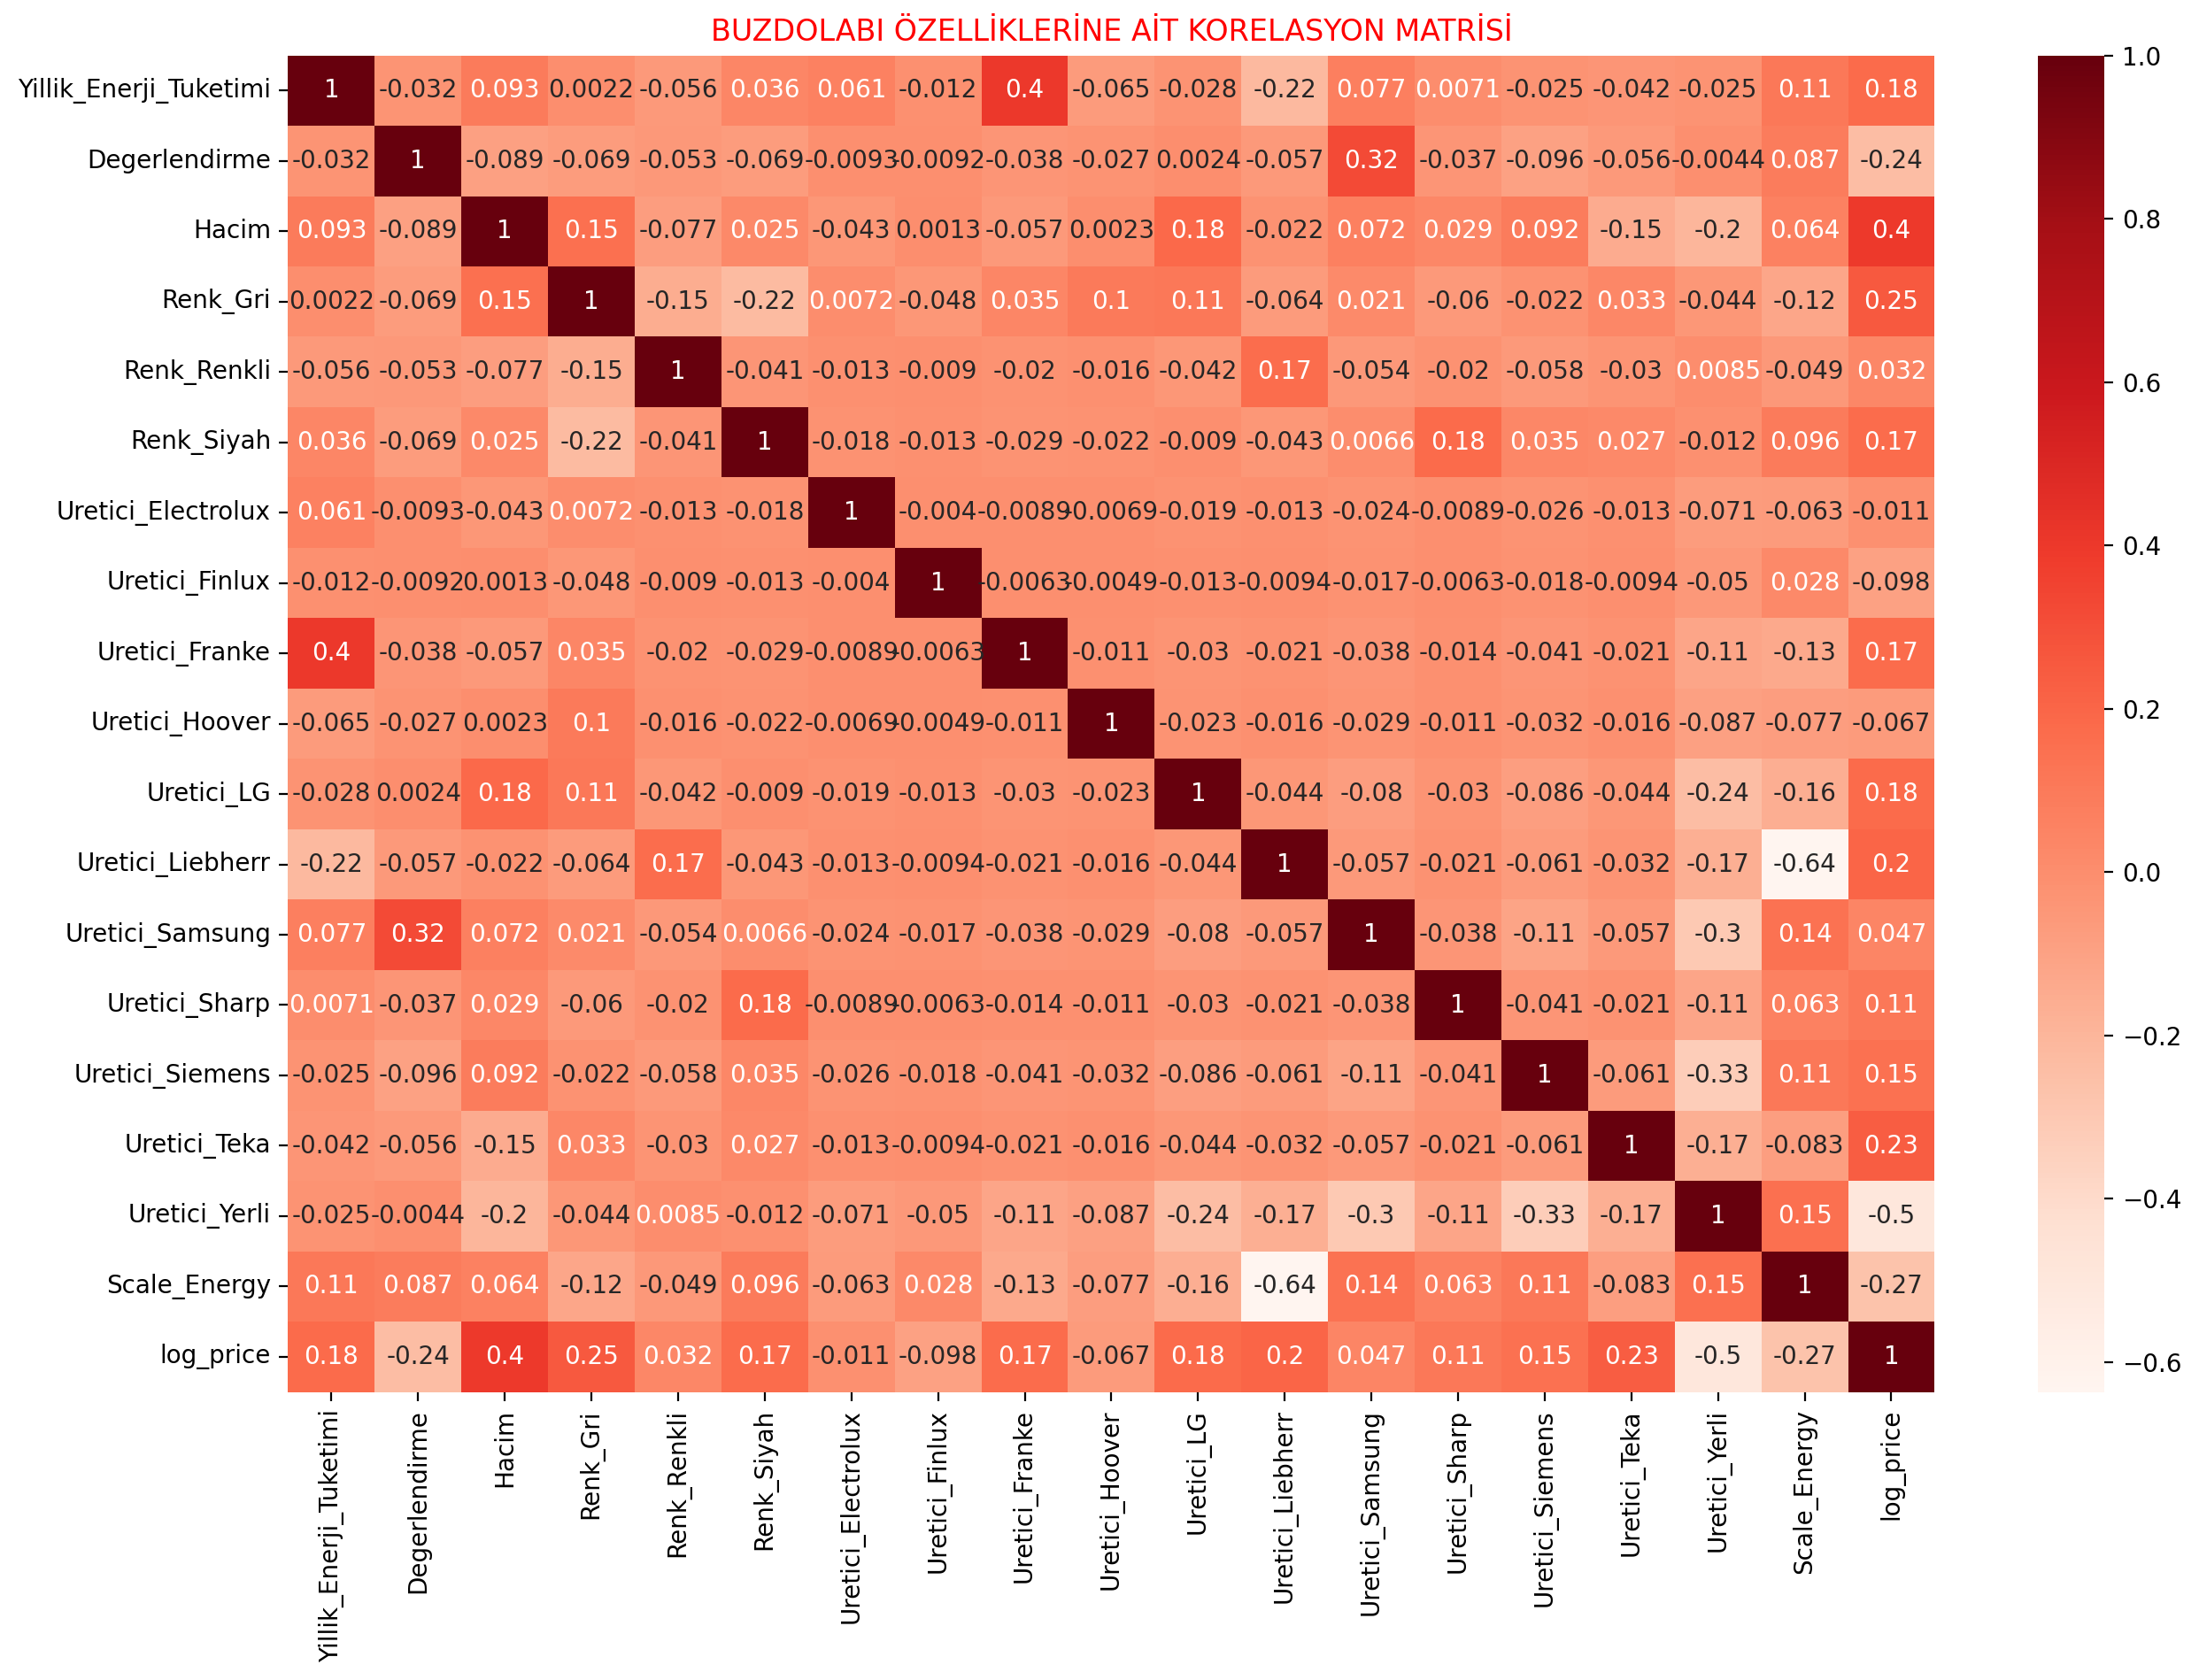

In [63]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("BUZDOLABI ÖZELLİKLERİNE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(new_df7.corr(), cmap="Reds", annot=True)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/05_CorrelationMatrixofHouseAttributes.png', dpi=200)

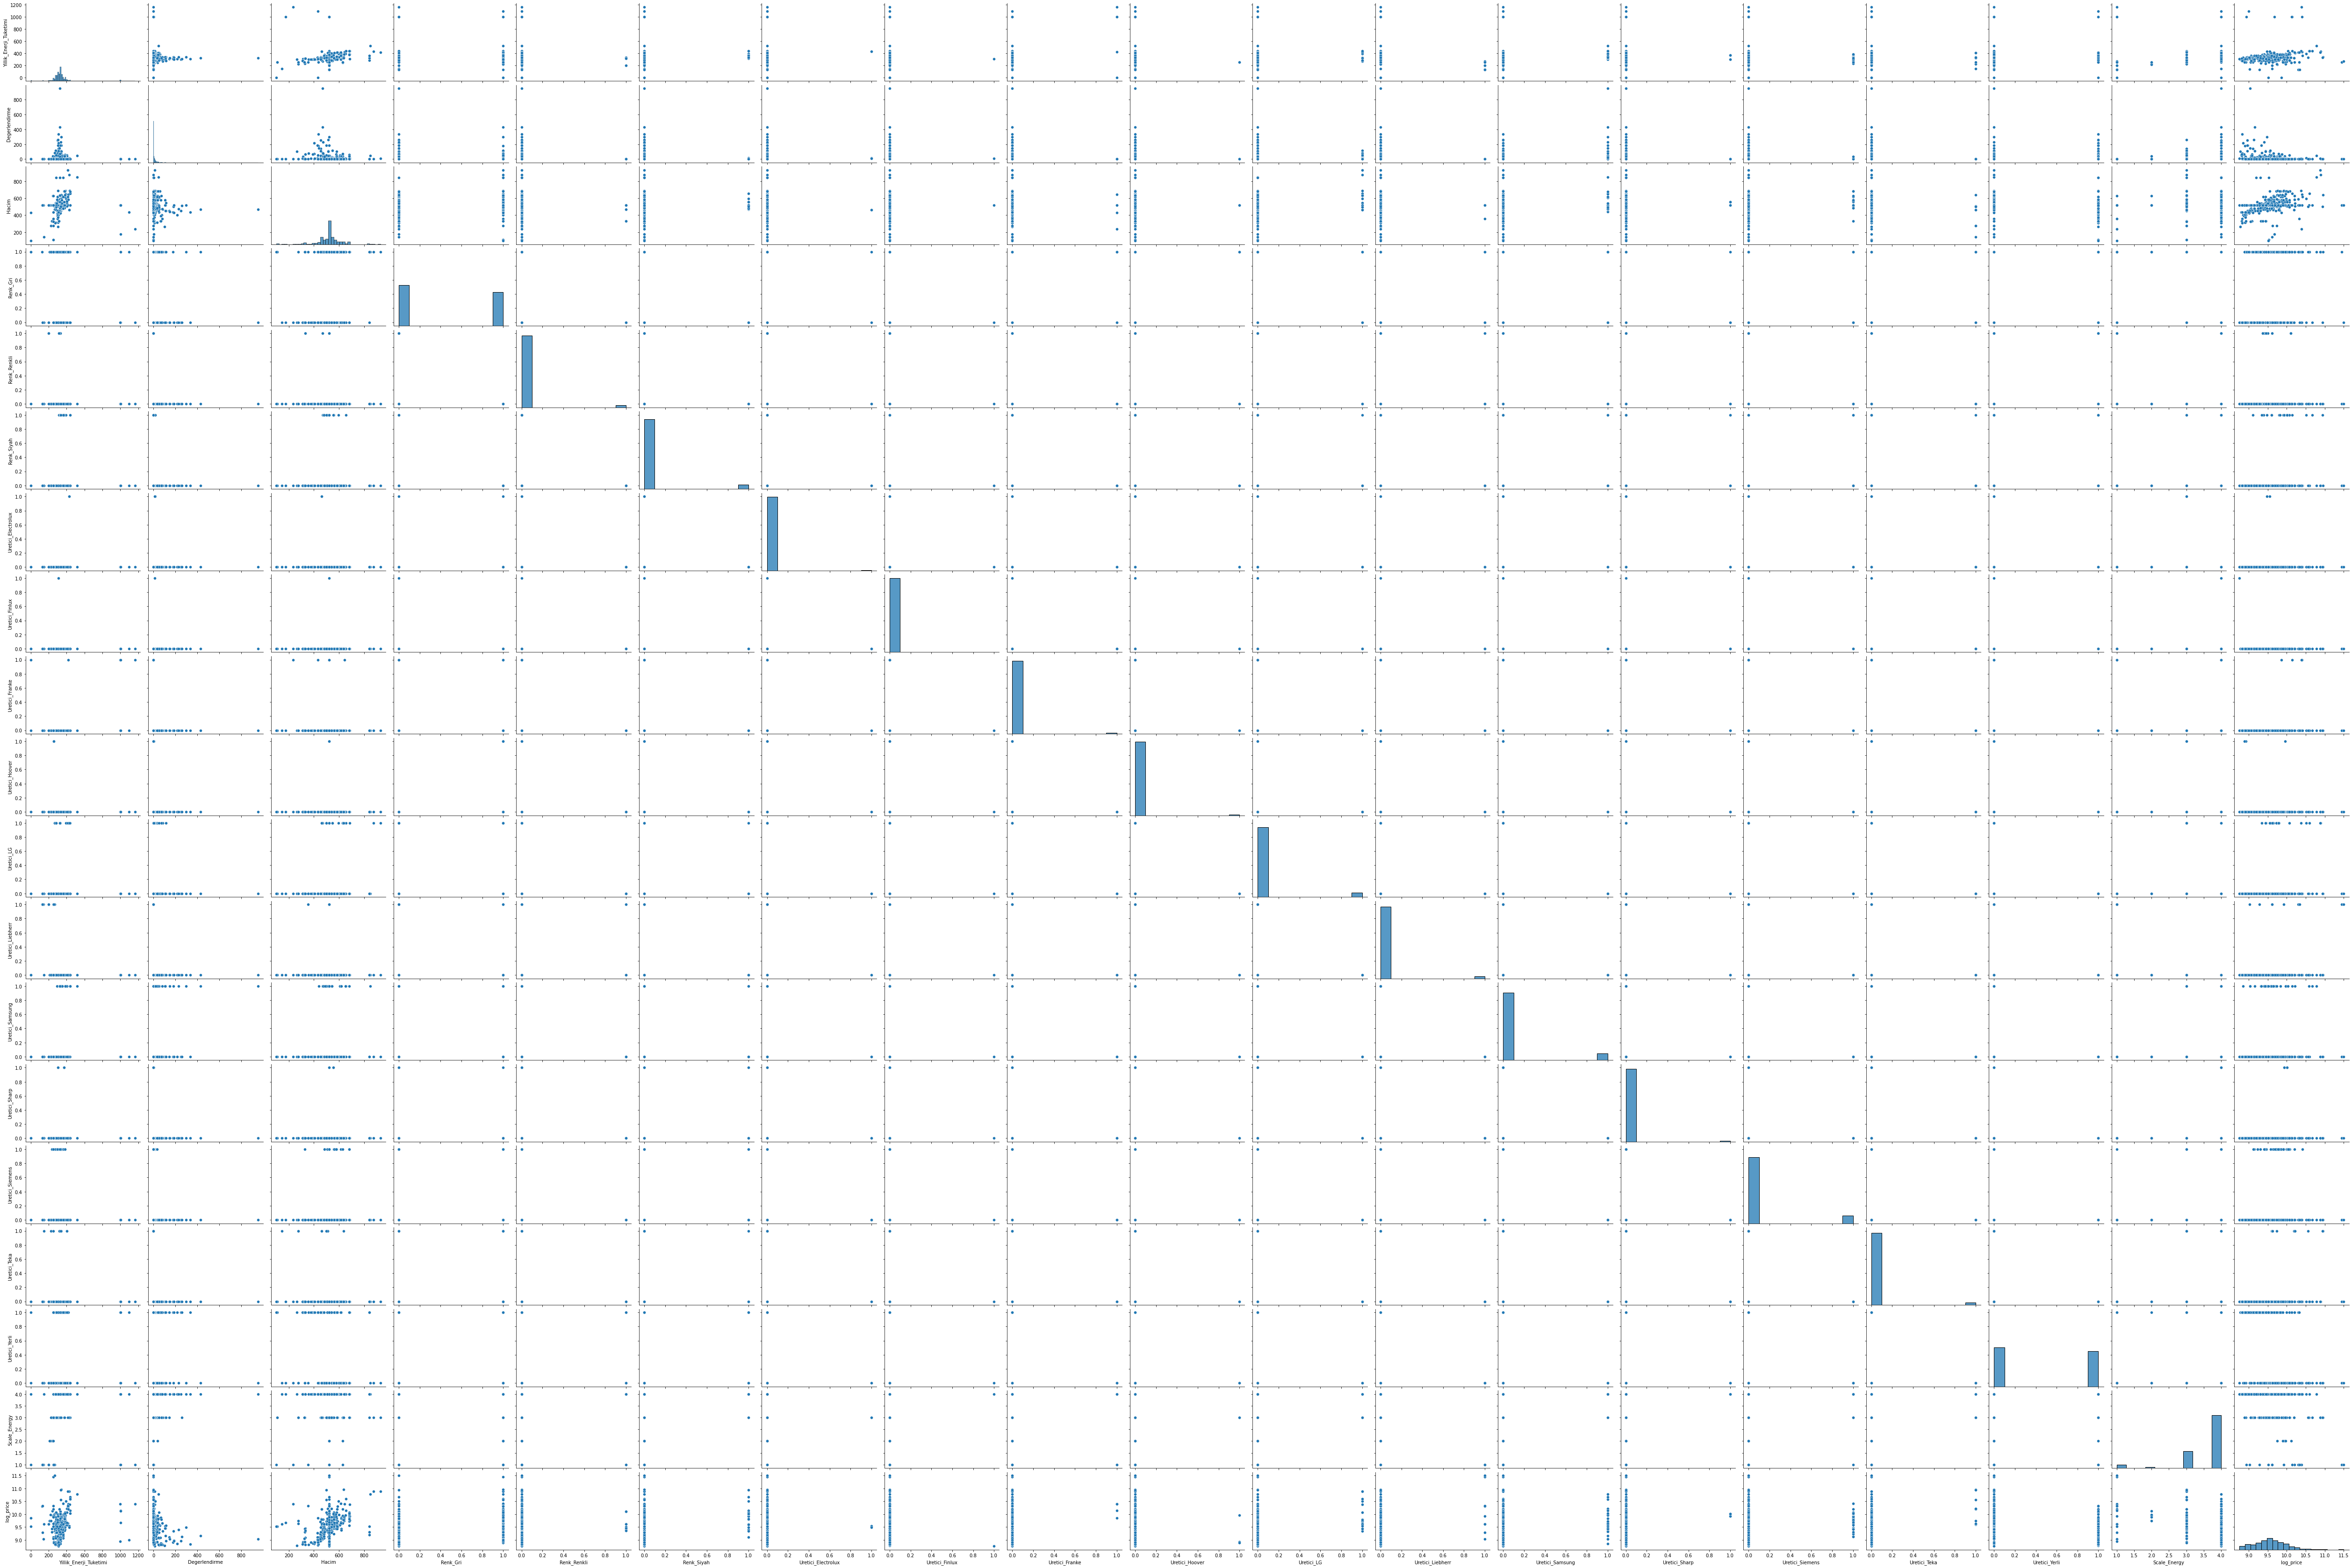

In [64]:
sns.pairplot(new_df7, aspect=1.5)
#plt.savefig('C:\Users\berrin.gocer\Desktop\ITU-PROJE/07_DistributionofAttributes.png', dpi=200)

In [95]:
##Machine Learning

In [ ]:
#For LinearRegression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = new_df7.drop('log_price',axis=1), new_df7['log_price']

train = new_df7
test = new_df7

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)


# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

score_lr_model_test = round(lr_model.score(x_test, y_test) * 100, 2)
score_lr_model_val = round(lr_model.score(x_val, y_val) * 100, 2)


print("R^2 Score Value (Test): ", round(lr_model.score(x_test, y_test) * 100, 2), "\n")

print("R^2 Score Value (Validation): ", round(lr_model.score(x_val, y_val) * 100, 2), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  0.11256877974187232 

R^2 Score Value (Test):  47.66 

R^2 Score Value (Validation):  40.66 

Coefficients:
 [ 0.00101786 -0.00133859  0.0011906   0.19528772  0.00636064  0.40532229
 -0.29064905 -0.78579873  0.06280871 -0.55969478  0.02079282  0.26080669
 -0.03301664  0.16767591  0.01917143  0.43598254 -0.30904527 -0.12543045]


In [85]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.datasets import make_blobs
model = LinearRegression()
lr_model.fit(X, y)
new_input = [[256,105,524.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4]]
new_output = lr_model.predict(new_input)
print(new_input, new_output)

[[256, 105, 524.0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4]] [9.07817781]


In [144]:
#Yillik_Enerji_Tuketimi
#Uretici_Franke
#Hacim

new_df9 = new_df7.copy()

# multiplicative interaction
new_df9['Y_E_Tuketimi_Hacim'] = new_df9['Yillik_Enerji_Tuketimi'] * new_df9['Hacim']
new_df9['Hacim'] = new_df9['Hacim'] ** 2
new_df9['New_Feature_3'] = new_df9['Yillik_Enerji_Tuketimi'] * new_df9['Scale_Energy'] * new_df9['Hacim']

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = new_df9.drop('log_price',axis=1), new_df9['log_price']

train = new_df9
test = new_df9

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=20)

# fit linear regression to training data
lr2_model = LinearRegression()

# fit linear model

lr2_model.fit(x_train,y_train)
pred = lr2_model.predict(x_val)


# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

score_lr2_model_test = round(lr2_model.score(x_test, y_test) * 100, 2)
score_lr2_model_val = round(lr2_model.score(x_val, y_val) * 100, 2)


print("R^2 Score Value (Test): ", round(lr2_model.score(x_test, y_test) * 100, 2), "\n")

print("R^2 Score Value (Validation): ", round(lr2_model.score(x_val, y_val) * 100, 2), "\n")

print("Coefficients:\n", lr2_model.coef_)

MSE Value:  0.10747148072960476 

R^2 Score Value (Test):  50.36 

R^2 Score Value (Validation):  43.35 

Coefficients:
 [ 3.32069733e-05 -1.20997708e-03 -4.13882840e-07  1.78055733e-01
  2.41114649e-02  3.96102829e-01 -3.25321395e-01 -7.62512857e-01
  3.20373023e-02 -5.21049285e-01 -4.57749857e-03  1.79692127e-01
 -5.23688902e-02  1.68519216e-01  3.01548745e-02  3.79234504e-01
 -3.12188577e-01 -2.32141329e-01  1.17023982e-06  9.66929514e-10]


In [129]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.datasets import make_blobs
model = LinearRegression()
lr2_model.fit(X, y)
new_input = [[256,105,524.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4,2]]
new_output = lr2_model.predict(new_input)
print(new_input, new_output)

[[256, 105, 524.0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 2]] [8.62400318]


In [130]:
#Yillik_Enerji_Tuketimi
#Uretici_Franke
#Hacim

new_df10 = new_df7.copy()

# multiplicative interaction
new_df10['New_Feature'] = new_df10['Yillik_Enerji_Tuketimi'] * new_df10['Scale_Energy'] * new_df10['Hacim']

In [132]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.datasets import make_blobs
model = LinearRegression()
lr2_model.fit(X, y)
new_input = [[256,105,524.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4,2]]
new_output = lr2_model.predict(new_input)
print(new_input, new_output)

[[256, 105, 524.0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 2]] [8.62400318]


In [134]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.datasets import make_blobs
model = LinearRegression()
model.fit(X, y)
new_input = [[256,105,524.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4]]
new_output = model.predict(new_input)
print(new_input, new_output)

[[256, 105, 524.0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4]] [9.07817781]


In [135]:
#For Ridge

In [136]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X, y = new_df7.drop('log_price',axis=1), new_df7['log_price']

train = new_df7
test = new_df7

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=20)

##training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_val)

# calculating mse
score_ridgeReg_test = round(ridgeReg.score(x_test, y_test) * 100, 2)
score_ridgeReg_val = round(ridgeReg.score(x_val, y_val) * 100, 2)


print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", round(ridgeReg.score(x_test, y_test) * 100, 2), "\n")

print("R^2 Score Value (Validation): ", round(ridgeReg.score(x_val, y_val) * 100, 2), "\n")

print("Coefficients:\n", ridgeReg.coef_)

MSE Value:  0.10982773967167625 

R^2 Score Value (Test):  49.34 

R^2 Score Value (Validation):  42.11 

Coefficients:
 [ 0.00094142 -0.00132758  0.00116009  0.18615402  0.00654812  0.38595154
 -0.25356607 -0.7431545   0.10692059 -0.51640016  0.03940368  0.26792809
 -0.01702508  0.17763907  0.032928    0.42813492 -0.28965767 -0.11830656]


In [137]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_blobs
model = Ridge(alpha=0.05, normalize=True)
model.fit(X, y)
new_input = [[256,105,524.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4]]
new_output = model.predict(new_input)
print(new_input, new_output)

[[256, 105, 524.0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4]] [9.10725854]


In [138]:
#For Lasso

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


from sklearn.model_selection import train_test_split

X, y = new_df7.drop('log_price',axis=1), new_df7['log_price']

train = new_df7
test = new_df7

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=20)



lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

score_lassoReg_test = round(lassoReg.score(x_test, y_test) * 100, 2)
score_lassoReg_val = round(lassoReg.score(x_val, y_val) * 100, 2)


print("R^2 Score Value (Test): ", round(lassoReg.score(x_test, y_test) * 100, 2), "\n")

print("R^2 Score Value (Validation): ", round(lassoReg.score(x_val, y_val) * 100, 2), "\n")

print("Coefficients:\n", lassoReg.coef_)

MSE Value:  0.19009716850296124 

R^2 Score Value (Test):  -9.46 

R^2 Score Value (Validation):  -0.2 

Coefficients:
 [ 0. -0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0.]


In [140]:
from sklearn.linear_model import Lasso #lasso ridge regularization
from sklearn.datasets import make_blobs
model = Lasso(alpha=0.05, normalize=True)
model.fit(X, y)
new_input = [[256,105,524.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4]]
new_output = model.predict(new_input)
print(new_input, new_output)

[[256, 105, 524.0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4]] [9.57936828]


In [149]:
print('\n','Modeller ve Skor Değerleri:','\n'
      '\n','LinearRegression_model_test:', score_lr_model_test, '\n',
      '\n','LinearRegression2_model_test', score_lr2_model_test, '\n'
      '\n','ridgeReg_test', score_ridgeReg_test, '\n'
      '\n','lassoReg_test',score_lassoReg_test, '\n')


 Modeller ve Skor Değerleri: 

 LinearRegression_model_test: 47.66 
 
 LinearRegression2_model_test 50.36 

 ridgeReg_test 49.34 

 lassoReg_test -9.46 

